In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt



In [10]:
data = pd.read_csv('data.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   gas       308 non-null    int64
 1   CO        308 non-null    int64
 2   hydrogen  308 non-null    int64
 3   class     308 non-null    int64
dtypes: int64(4)
memory usage: 9.8 KB


In [11]:
features = ['gas','CO','hydrogen']
# Separating out the features
data_features = data[features]
data_corr = data_features.corr()
data_corr

,gas,CO,hydrogen
gas,1.000000,-0.051556,0.515683
CO,-0.051556,1.000000,0.284142
hydrogen,0.515683,0.284142,1.000000


In [12]:
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_features)
data_scaled = pd.DataFrame(data_scaled, columns=features)
X = data_scaled
y = data['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)


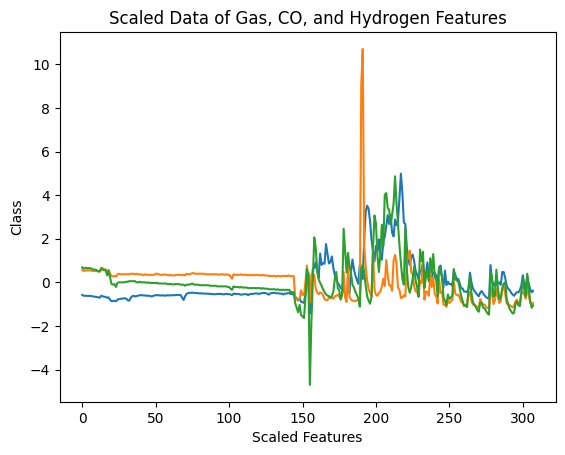

In [13]:
plt.plot(X)
plt.xlabel('Scaled Features')
plt.ylabel('Class')
plt.title('Scaled Data of Gas, CO, and Hydrogen Features')
plt.show()


In [14]:


data_scaled = pd.DataFrame(data_scaled, columns=features)
nb_model = GaussianNB()
nb_model.fit(X, y)
nb_predict = nb_model.predict(X_test)
accuracy_score(y_test, nb_predict)



0.989247311827957

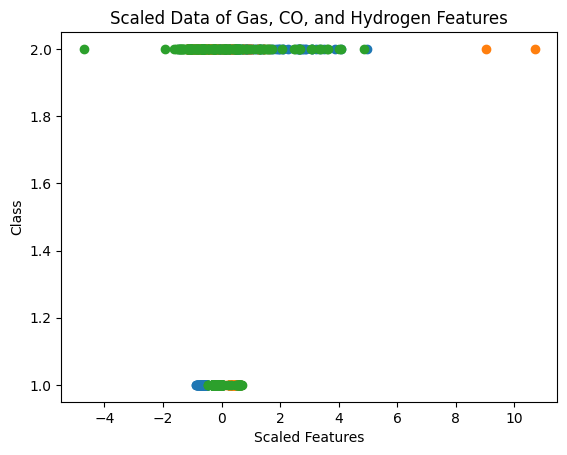

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.plot(X, y, 'o')
plt.xlabel('Scaled Features')
plt.ylabel('Class')
plt.title('Scaled Data of Gas, CO, and Hydrogen Features')
plt.show()
plt.show()

In [17]:
import joblib

# Save the model to a joblib file
joblib.dump(nb_model, 'nb_model.joblib')


['nb_model.joblib']

In [18]:
import micromlgen

c_code = micromlgen.port(nb_model, classmap=['1', '2'])

AttributeError: 'GaussianNB' object has no attribute 'sigma_'